<a href="https://colab.research.google.com/github/MhdRaihanB/ML_Tasks_MhdRaihanB/blob/main/3rdWeekTasks/kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Muhammad Raihan Butar-Butar

NIM : 1103213077

Tugas Lecture 3 Classification using KNN on iris dataset

Dataset : iris.data.csv

Dokumentasi ChatGPT :

# MOUNT GOOGLE DRIVE

Prompt ChatGPT : berikan kode untuk menghubungkan google drive dengan google colab

In [15]:
from google.colab import drive

# Menghubungkan dengan Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# IMPORT LIBRARY

Promptp ChatGPT : berikan kode python untuk membuat model kNN dengan Iris.csv dataset dengan path /content/drive/MyDrive/Dataset/iris.data.csv serta berikan kNN accuracy dan visualisasi confusion matrix menggunakan heatmap

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# MEMBACA DATASET

In [17]:
dataset_path = "/content/drive/MyDrive/Dataset/iris.data.csv"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df = pd.read_csv(dataset_path, names=column_names)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# PEMBUATAN MODEL

In [18]:
# Melakukan encoding pada kelas target
le = LabelEncoder()
iris_df['class'] = le.fit_transform(iris_df['class'])

# Memisahkan fitur dan target
X = iris_df.drop('class', axis=1)
y = iris_df['class']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model kNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Memprediksi kelas pada data uji
y_pred = knn.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("kNN Accuracy:", accuracy)


kNN Accuracy: 1.0


# VISUALISASI MODEL DENGAN CONFUSION MATRIX

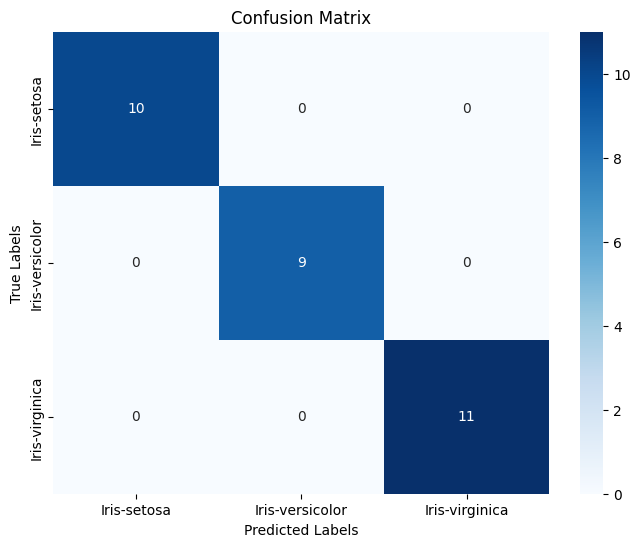

In [19]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()